# Exercise 5

# Problem 5.1

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file = pd.read_csv('Ads.csv') 

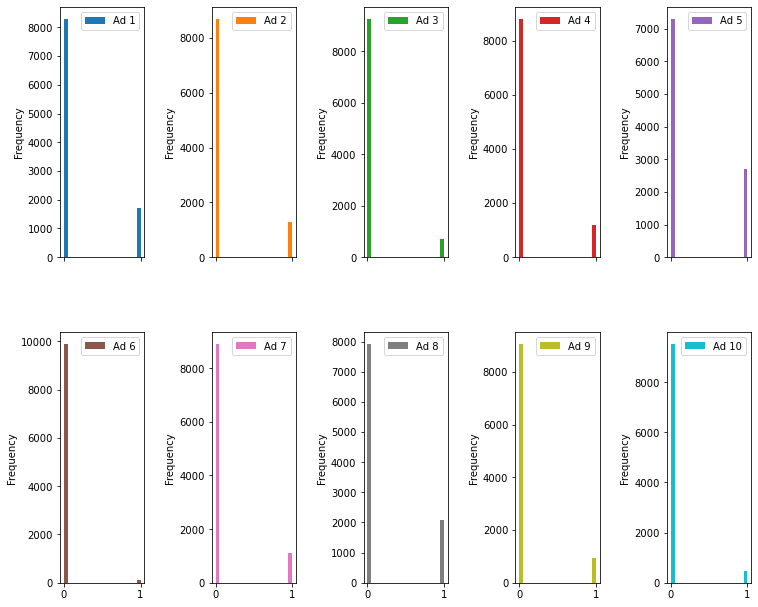

In [37]:
fig, ax = file.plot.hist(subplots=True, layout=(2,5), figsize=(12, 10), bins=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.3)
plt.show()

#The frequency of data is shown using a histogram. 
#In a histogram, the higher the bar, the more common it is in the observed data [1].
#It is evident, even without any statistical study, that "Ad 6" is most clicked and "Ad 5" clicked least.  
#[1] https://towardsdatascience.com/distribution-visualization-101-with-python-a12d481afec7

# Problem 5.2

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

dataset = pd.read_csv('Ads.csv') 

N = 10000
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    
print("Total reward : ", total_reward)

Total reward :  2608


# Problem 5.3

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import beta, bernoulli
import random
import math

RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)
init_notebook_mode(connected=True)

In [40]:
#assume that the actual CTR values for both Ads for simulation purposes are known.
ACTUAL_CTR = [.45, .65]
print('Actual CTR for Ad #0 is:', ACTUAL_CTR[0])
print('Actual CTR for Ad #1 is:', ACTUAL_CTR[1])

Actual CTR for Ad #0 is: 0.45
Actual CTR for Ad #1 is: 0.65


In [41]:
#For each alrorithm we will perform 1000 trials
n = 1000

regret = 0 
ctr = {0: [], 1: []} #lists for collecting the calculated CTR 
index_list = [] #list for collecting the number of randomly choosen Ad

#set the initial values for impressions and clicks 
impressions = [0,0] 
clicks = [0,0]

for i in range(n):    
    
    random_index = np.random.randint(0,2,1)[0] #randomly choose the value between [0,1]
    index_list.append(random_index) #add the value to list
    
    impressions[random_index] += 1 #add 1 impression value for the choosen Ad
    did_click = bernoulli.rvs(ACTUAL_CTR[random_index]) #simulate if the person clicked on the ad usind Actual CTR value
    
    if did_click:
        clicks[random_index] += did_click #if person clicked add 1 click value for the choosen Ad
    
    #calculate the CTR values and add them to list
    if impressions[0] == 0:
        ctr_0 = 0
    else:
        ctr_0 = clicks[0]/impressions[0]
        
    if impressions[1] == 0:
        ctr_1 = 0
    else:
        ctr_1 = clicks[1]/impressions[1]
        
    ctr[0].append(ctr_0)
    ctr[1].append(ctr_1)
    
    #calculate the regret
    regret += max(ACTUAL_CTR) - ACTUAL_CTR[random_index] #here max(ACTUAL_CTR) is the true CTR for the best performing ad 
    #and ACTUAL_CTR[random_index] is the CTR of the ad chosen in the random_index trial.

print(regret)

98.40000000000086
